In [1]:
! pip install tensorflow

In [2]:
! pip show tensorflow

Name: tensorflow
Version: 2.16.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\joann\anaconda3\Lib\site-packages
Requires: tensorflow-intel
Required-by: 


In [3]:
! pip install tflearn

In [4]:
! pip install tqdm

In [5]:
! pip install -U --no-deps tflearn

In [6]:
! pip install tensorflow==2.16.1

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

original_data = np.random.rand(100, 64, 64, 1)  

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


augmented_data = []
for img in original_data:
    img = img.reshape((1,) + img.shape)  
    i = 0
    for batch in datagen.flow(img, batch_size=1):
        augmented_data.append(batch[0])
        i += 1
        if i >= 5: 
            break

augmented_data = np.array(augmented_data)
print("增強後的圖像數量:", len(augmented_data))

增強後的圖像數量: 500


In [8]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
TRAIN_DIR=r"C:\Users\joann\picture\train"
TEST_DIR=r"C:\Users\joann\picture\test"
IMG_SIZE=50
LR=1e-3
MODEL_NAME = 'dogs-vs-cats-convnet'

In [10]:
def label_img(word_label):
    if word_label == 'cat':
        return [1, 0]
    elif word_label == 'dog':
        return [0, 1]
    else:
        return [0, 0] 

In [11]:
def create_train_data():
     training_data=[]
     for img in tqdm(os.listdir(TRAIN_DIR)):
          label=label_img(img)
          path=os.path.join(TRAIN_DIR, img)
          img=cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE),
              (IMG_SIZE,IMG_SIZE))
          training_data.append([np.array(img),np.array(label)])
     shuffle(training_data)
     np.save('train_data.npy',training_data)
     return training_data

In [12]:
def create_train_data():
     training_data=[]
     for img in tqdm(os.listdir(TRAIN_DIR)):
          path=os.path.join(TRAIN_DIR, img)
          img_num=img.split('.')[0]
          img=cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))
          testing_data.append([np.array(img),img_num])
     shuffle(training_data)
     np.save('train_data.npy',training_data)
     return training_data

In [15]:
import os
from tqdm import tqdm  

TRAIN_DIR = r"C:\Users\joann\picture\train" 

def create_train_data():
    training_data = []
    if not os.path.exists(TRAIN_DIR):
        print(f"Error: The directory {TRAIN_DIR} does not exist.")
        return training_data  

    for img in tqdm(os.listdir(TRAIN_DIR)):
        path = os.path.join(TRAIN_DIR, img)
        img_num = img.split('.')[0]

    return training_data

train_data = create_train_data()

100%|██████████| 11941/11941 [00:00<00:00, 463013.63it/s]


In [16]:
import os

TRAIN_DIR = r"C:\Users\joann\picture\train"

if not os.path.exists(TRAIN_DIR):
    os.makedirs(TRAIN_DIR)
    print(f"Created directory {TRAIN_DIR}")

def create_train_data():
    training_data = []
    if not os.path.exists(TRAIN_DIR):
        print(f"Error: The directory {TRAIN_DIR} does not exist.")
        return training_data

    for img in tqdm(os.listdir(TRAIN_DIR)):
        path = os.path.join(TRAIN_DIR, img)
        img_num = img.split('.')[0]
              
    return training_data

train_data = create_train_data()

100%|██████████| 11941/11941 [00:00<00:00, 479591.16it/s]


In [17]:
import os
from tqdm import tqdm

TRAIN_DIR = r"C:\Users\joann\picture\train"
TEST_DIR = r"C:\Users\joann\picture\test"

def create_train_data():
    training_data = []
    if not os.path.exists(TRAIN_DIR):
        print(f"Error: The directory {TRAIN_DIR} does not exist.")
        return training_data

    file_list = os.listdir(TRAIN_DIR)
    if not file_list:
        print(f"No files found in directory {TRAIN_DIR}.")
        return training_data

    for img in tqdm(file_list):
        path = os.path.join(TRAIN_DIR, img)
        img_num = img.split('.')[0]
        # 假設這裡有讀取和處理圖像的代碼
        # training_data.append((img_num, path))  # 示例：將數據附加到列表中

    return training_data

def create_test_data():
    test_data = []
    if not os.path.exists(TEST_DIR):
        print(f"Error: The directory {TEST_DIR} does not exist.")
        os.makedirs(TEST_DIR)
        print(f"Created directory {TEST_DIR}")

    file_list = os.listdir(TEST_DIR)
    if not file_list:
        print(f"No files found in directory {TEST_DIR}.")
        return test_data

    for img in tqdm(file_list):
        path = os.path.join(TEST_DIR, img)
        img_num = img.split('.')[0]
        # 假設這裡有讀取和處理圖像的代碼
        # test_data.append((img_num, path))  # 示例：將數據附加到列表中

    return test_data

# 調用函數
train_data = create_train_data()
test_data = create_test_data()

100%|██████████| 6000/6000 [00:00<00:00, 529817.98it/s]


In [18]:
from PIL import Image
import os

def create_test_images(directory, num_images=5):
    if not os.path.exists(directory):
        os.makedirs(directory)
    for i in range(num_images):
        img = Image.new('RGB', (100, 100), color=(73, 109, 137))
        img.save(os.path.join(directory, f'test_image_{i}.jpg'))
    print(f"{num_images} test images created in {directory}")

create_test_images(r"C:\Users\joann\picture\train")
create_test_images(r"C:\Users\joann\picture\test")

5 test images created in C:\Users\joann\picture\train
5 test images created in C:\Users\joann\picture\test


In [19]:
from PIL import Image

TEST_DIR = r"C:\Users\joann\picture\test"
if not os.path.exists(TEST_DIR):
    os.makedirs(TEST_DIR)

for i in range(5):
    img = Image.new('RGB', (100, 100), color = (73, 109, 137))
    img.save(os.path.join(TEST_DIR, f'test_image_{i}.jpg'))

In [20]:
train_data=create_train_data()
test_data=create_test_data()

100%|██████████| 6005/6005 [00:00<00:00, 443515.39it/s]


In [21]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [45]:
import os

print("當前目錄下的文件:")
for file in os.listdir('.'):
    print(file)

當前目錄下的文件:
.anaconda
.bash_history
.conda
.condarc
.continuum
.git
.ipynb_checkpoints
.ipython
.jupyter
.keras
.matplotlib
.ms-ad
aespa.mp3
anaconda3
AppData
Apple
Application Data
blue.mp3
Contacts
Cookies
DL3_asl.ipynb
Documents
Dog vs Cat Detection.ipynb
Dogs vs Cats.ipynb
Dogs vs Cats.zip
Dogs vs Cats1.ipynb
Downloads
equation.ipynb
face1.jpg
face2.jpg
face3.jpg
face4.jpg
face5.jpg
Favorites
Fruit.ipynb
Girls.mp3
Hi.ipynb
korean_ilove_karina.mp3
Links
Local Settings
models
Music
My Documents
NetHood
Neural Network.ipynb
NTUSER.DAT
ntuser.dat.LOG1
ntuser.dat.LOG2
NTUSER.DAT{7fb1ef06-6d4c-11ed-9efc-84c020e0c652}.TM.blf
NTUSER.DAT{7fb1ef06-6d4c-11ed-9efc-84c020e0c652}.TMContainer00000000000000000001.regtrans-ms
NTUSER.DAT{7fb1ef06-6d4c-11ed-9efc-84c020e0c652}.TMContainer00000000000000000002.regtrans-ms
ntuser.ini
OneDrive
picture
Pictures
PrintHood
Read CSV.ipynb
Recent
red.mp3
Saved Games
Searches
SendTo
signal.ipynb
spam.csv
stock.ipynb
stock2.ipynb
SVM.ipynb
Tax.ipynb
Tax2.ipynb
Tem

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
import os

model = Sequential([
    Input(shape=(64, 64, 1)), 
    Conv2D(32, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

MODEL_NAME = 'your_model_name'
model_save_path = '{}.h5'.format(MODEL_NAME)
model.save(model_save_path)
print(f"Model saved to {model_save_path}")

if os.path.exists(model_save_path):
    print(f"Model file found at: {model_save_path}")
else:
    print(f"Model file not found at: {model_save_path}")

Model saved to your_model_name.h5
Model file found at: your_model_name.h5


In [47]:
import os
import tensorflow as tf
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

MODEL_NAME = 'your_model_name'

model = Sequential([
    Input(shape=(64, 64, 1)),  
    Conv2D(32, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_path = '{}.h5'.format(MODEL_NAME)
if os.path.exists(model_path):
    model = load_model(model_path)
    print('Model loaded!')
else:
    print('Model file not found!')

Model loaded!


In [48]:
model_save_path = 'C:/path/to/your/model/{}.h5'.format(MODEL_NAME)

In [49]:
import os

current_dir = os.getcwd()
print("当前工作目录:", current_dir)

print("当前目录下的文件:")
for file in os.listdir('.'):
    print(file)

当前工作目录: C:\Users\joann
当前目录下的文件:
.anaconda
.bash_history
.conda
.condarc
.continuum
.git
.ipynb_checkpoints
.ipython
.jupyter
.keras
.matplotlib
.ms-ad
aespa.mp3
anaconda3
AppData
Apple
Application Data
blue.mp3
Contacts
Cookies
DL3_asl.ipynb
Documents
Dog vs Cat Detection.ipynb
Dogs vs Cats.ipynb
Dogs vs Cats.zip
Dogs vs Cats1.ipynb
Downloads
equation.ipynb
face1.jpg
face2.jpg
face3.jpg
face4.jpg
face5.jpg
Favorites
Fruit.ipynb
Girls.mp3
Hi.ipynb
korean_ilove_karina.mp3
Links
Local Settings
models
Music
My Documents
NetHood
Neural Network.ipynb
NTUSER.DAT
ntuser.dat.LOG1
ntuser.dat.LOG2
NTUSER.DAT{7fb1ef06-6d4c-11ed-9efc-84c020e0c652}.TM.blf
NTUSER.DAT{7fb1ef06-6d4c-11ed-9efc-84c020e0c652}.TMContainer00000000000000000001.regtrans-ms
NTUSER.DAT{7fb1ef06-6d4c-11ed-9efc-84c020e0c652}.TMContainer00000000000000000002.regtrans-ms
ntuser.ini
OneDrive
picture
Pictures
PrintHood
Read CSV.ipynb
Recent
red.mp3
Saved Games
Searches
SendTo
signal.ipynb
spam.csv
stock.ipynb
stock2.ipynb
SVM.ipynb
T

In [52]:
import os

model_dir = r'C:\Users\joann\Documents/my_model_directory'

os.makedirs(model_dir, exist_ok=True)

os.chdir(model_dir)
print("當前工作目錄:", os.getcwd())

print("當前目錄下的文件和文件夾:")
for item in os.listdir('.'):
    print(item)

當前工作目錄: C:\Users\joann\Documents\my_model_directory
當前目錄下的文件和文件夾:


In [53]:
import os
import tensorflow as tf
from tensorflow.keras.models import load_model

MODEL_NAME = 'your_model_name'

model_path = '{}.h5'.format(MODEL_NAME)
print(f"Checking for model file at: {model_path}")

if os.path.exists(model_path):
    model = load_model(model_path)
    print('Model loaded successfully!')
else:
    print('Model file not found at:', model_path)

Checking for model file at: your_model_name.h5
Model file not found at: your_model_name.h5


In [54]:
import os
print("Current working directory:", os.getcwd())

Current working directory: C:\Users\joann\Documents\my_model_directory


In [55]:
model_path = 'C:/path/to/your_model_name.h5'

In [56]:
import os
from tensorflow.keras.models import load_model

MODEL_NAME = 'your_model_name'
model_path = 'C:/path/to/your_model_name.h5'  

print(f"Checking for model file at: {model_path}")

if os.path.exists(model_path):
    model = load_model(model_path)
    print('Model loaded successfully!')
else:
    print('Model file not found at:', model_path)

Checking for model file at: C:/path/to/your_model_name.h5
Model file not found at: C:/path/to/your_model_name.h5


In [57]:
if os.path.exists('{}.meta'.format(MODEL_NAME)):
      model.load(MODEL_NAME)
      print('model loaded!')

In [58]:
import numpy as np

train_data = np.random.rand(10000, 10)
train = train_data[:-8000]
test = train_data[-8000:]

In [59]:
print("Train 数据样本:")
for i in range(5):  
    print(train[i])

print("Test 数据样本:")
for i in range(5):  
    print(test[i])

Train 数据样本:
[0.1921471  0.57204127 0.31167115 0.93525328 0.41878871 0.64108475
 0.75887961 0.64107283 0.66892707 0.8715808 ]
[0.70063753 0.62570797 0.7842734  0.45162062 0.39216215 0.21280153
 0.05410367 0.91907111 0.46544658 0.18391467]
[0.78170921 0.0898415  0.35484671 0.2979297  0.99764451 0.20258005
 0.66782604 0.11934394 0.30280757 0.56854323]
[0.12794156 0.93206634 0.52307883 0.33239363 0.19834435 0.12634824
 0.30592618 0.11791597 0.75318801 0.65411844]
[0.98800322 0.95200538 0.67387061 0.59354159 0.94927688 0.11747829
 0.03512397 0.80811526 0.02086588 0.17555719]
Test 数据样本:
[0.427055   0.44067091 0.40687416 0.12643651 0.52276506 0.69576104
 0.14868301 0.90823239 0.22713301 0.12373425]
[0.44391297 0.04099464 0.84382059 0.76905701 0.90642072 0.5511394
 0.76119738 0.20599456 0.4679225  0.42187785]
[0.84003958 0.9049354  0.60092849 0.62058092 0.70719234 0.80266877
 0.9786775  0.40627956 0.61126704 0.70914098]
[0.37468822 0.08647531 0.0501298  0.63903478 0.87097125 0.80516664
 0.1670

In [60]:
import numpy as np

IMG_SIZE = 64

def check_and_fix_data(data):
    fixed_data = []
    for item in data:
        if isinstance(item, tuple) and len(item) == 2:
            img, label = item
            img_array = np.array(img)
            if img_array.shape == (IMG_SIZE, IMG_SIZE) or img_array.shape == (IMG_SIZE, IMG_SIZE, 1):
                fixed_data.append((img_array, label))
            else:
                print(f"圖像形狀不匹配: {img_array.shape}")
        else:
            print(f"數據格式不正確: {item}")
    return fixed_data

train = check_and_fix_data(train)
test = check_and_fix_data(test)

X = np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Y = np.array([i[1] for i in train])

test_x = np.array([i[0] for i in test]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
test_y = np.array([i[1] for i in test])

print("訓練集圖像資料形狀:", X.shape)
print("訓練集標籤形狀:", Y.shape)
print("測試集圖像資料形狀:", test_x.shape)
print("測試集標籤形狀:", test_y.shape)

數據格式不正確: [0.1921471  0.57204127 0.31167115 0.93525328 0.41878871 0.64108475
 0.75887961 0.64107283 0.66892707 0.8715808 ]
數據格式不正確: [0.70063753 0.62570797 0.7842734  0.45162062 0.39216215 0.21280153
 0.05410367 0.91907111 0.46544658 0.18391467]
數據格式不正確: [0.78170921 0.0898415  0.35484671 0.2979297  0.99764451 0.20258005
 0.66782604 0.11934394 0.30280757 0.56854323]
數據格式不正確: [0.12794156 0.93206634 0.52307883 0.33239363 0.19834435 0.12634824
 0.30592618 0.11791597 0.75318801 0.65411844]
數據格式不正確: [0.98800322 0.95200538 0.67387061 0.59354159 0.94927688 0.11747829
 0.03512397 0.80811526 0.02086588 0.17555719]
數據格式不正確: [0.48632619 0.39732742 0.17486156 0.63953429 0.17249906 0.94232166
 0.92488521 0.79998688 0.95186968 0.36059389]
數據格式不正確: [4.51803509e-01 5.97735008e-01 7.50893536e-01 2.67630566e-01
 1.06188485e-04 1.14169596e-01 6.92954747e-01 3.86432651e-01
 3.23468253e-01 4.46965353e-02]
數據格式不正確: [0.89882295 0.5654976  0.8967214  0.38353919 0.06532745 0.3051938
 0.35388244 0.84927468 0.42082

數據格式不正確: [0.83908365 0.07795002 0.84501684 0.17954825 0.98876756 0.71866801
 0.81979215 0.10669302 0.39754094 0.16639415]
數據格式不正確: [0.17433439 0.58510788 0.66687288 0.8824329  0.96772547 0.17568412
 0.6716772  0.66430828 0.39230263 0.92942345]
數據格式不正確: [0.84902277 0.8980296  0.93991864 0.71655154 0.22434315 0.798364
 0.57450782 0.64136024 0.44712543 0.53992582]
數據格式不正確: [0.84497751 0.8439742  0.22215588 0.52889589 0.70448385 0.84742571
 0.26118345 0.60347361 0.42501887 0.82728071]
數據格式不正確: [0.3416442  0.49160053 0.17652406 0.00241751 0.95824587 0.80980155
 0.02965022 0.92419709 0.45538154 0.20154835]
數據格式不正確: [0.46585962 0.98142656 0.08219935 0.1597218  0.34617072 0.84231708
 0.52194669 0.83834652 0.03838751 0.49351786]
數據格式不正確: [0.26456044 0.37399294 0.04920436 0.94188853 0.57839387 0.22331867
 0.13009639 0.69154504 0.54798052 0.13719313]
數據格式不正確: [0.99810261 0.32847706 0.55117231 0.54894716 0.46320238 0.7178235
 0.87474596 0.1844527  0.3281514  0.34285664]
數據格式不正確: [0.26080939 0.7051

In [61]:
for i, data in enumerate(train[:5]):
    print(f"訓練資料第 {i + 1} 項: {data}")

for i, data in enumerate(test[:5]):
    print(f"測試資料第 {i + 1} 項: {data}")

In [62]:
X=np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE,1)
Y=[i[1] for i in train]
test_x=np.array([i[0] for i in test]).reshape(-1, IMG_SIZE, IMG_SIZE,1)
test_y=[i[1] for i in test]

In [63]:
import tensorflow as tf

print("Eager Execution enabled:", tf.executing_eagerly())

print("TensorFlow version:", tf.__version__)

Eager Execution enabled: True
TensorFlow version: 2.16.1


In [64]:
pip install matplotlib numpy

In [65]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

IMG_SIZE = 64  
LR = 0.001  

model = Sequential()

model.add(Conv2D(32, (5, 5), activation='relu', padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(Input(shape=(64, 64, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 30752)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,936,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,937,994 (15.02 MB)

 Trainable params: 3,937,994 (15.02 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [67]:
import tensorflow as tf

tf.compat.v1.enable_eager_execution()

print("Eager Execution enabled:", tf.executing_eagerly())

Eager Execution enabled: True


In [68]:
import tensorflow as tf
tf.compat.v1.enable_eager_execution()

print("Eager Execution enabled:", tf.executing_eagerly())

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np

IMG_SIZE = 64  

X_train = np.random.random((100, IMG_SIZE, IMG_SIZE, 1)).astype(np.float32)
y_train = tf.keras.utils.to_categorical(np.random.randint(2, size=(100,)), num_classes=2)

print(f"X_train 的形狀: {X_train.shape}, 類型: {type(X_train)}")
print(f"y_train 的形狀: {y_train.shape}, 類型: {type(y_train)}")

model = Sequential([
    Conv2D(32, (5, 5), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=3, batch_size=32)

model_save_path = 'models/your_model_name.keras'
import os
os.makedirs(os.path.dirname(model_save_path), exist_ok=True)
model.save(model_save_path)
print(f"Model saved to {model_save_path}")

if os.path.exists(model_save_path):
    loaded_model = tf.keras.models.load_model(model_save_path)
    print('Model loaded from', model_save_path)
else:
    print('Model file not found.')

Eager Execution enabled: True
X_train 的形狀: (100, 64, 64, 1), 類型: <class 'numpy.ndarray'>
y_train 的形狀: (100, 2), 類型: <class 'numpy.ndarray'>
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.4592 - loss: 1.1765
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.5144 - loss: 0.6931
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.4934 - loss: 0.6924
Model saved to models/your_model_name.keras
Model loaded from models/your_model_name.keras


In [69]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

if not tf.executing_eagerly():
    print("啟用 Eager Execution")
    tf.compat.v1.enable_eager_execution()

print("Eager Execution enabled:", tf.executing_eagerly())

IMG_SIZE = 64  

X_train = np.random.random((100, IMG_SIZE, IMG_SIZE, 1)).astype(np.float32)
y_train = tf.keras.utils.to_categorical(np.random.randint(2, size=(100,)), num_classes=2)

print(f"X_train 的形狀: {X_train.shape}, 類型: {type(X_train)}")
print(f"y_train 的形狀: {y_train.shape}, 類型: {type(y_train)}")

model = Sequential([
    Conv2D(32, (5, 5), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=3, batch_size=32)

model_save_path = 'models/your_model_name.keras'
os.makedirs(os.path.dirname(model_save_path), exist_ok=True)
model.save(model_save_path)
print(f"Model saved to {model_save_path}")

if os.path.exists(model_save_path):
    loaded_model = tf.keras.models.load_model(model_save_path)
    print('Model loaded from', model_save_path)
else:
    print('Model file not found.')

Eager Execution enabled: True
X_train 的形狀: (100, 64, 64, 1), 類型: <class 'numpy.ndarray'>
y_train 的形狀: (100, 2), 類型: <class 'numpy.ndarray'>
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.5320 - loss: 1.2081
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.5372 - loss: 0.6844
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.5151 - loss: 0.6931
Model saved to models/your_model_name.keras
Model loaded from models/your_model_name.keras


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Cat Possibility: 50.78% 
Dog Possibility: 49.22%


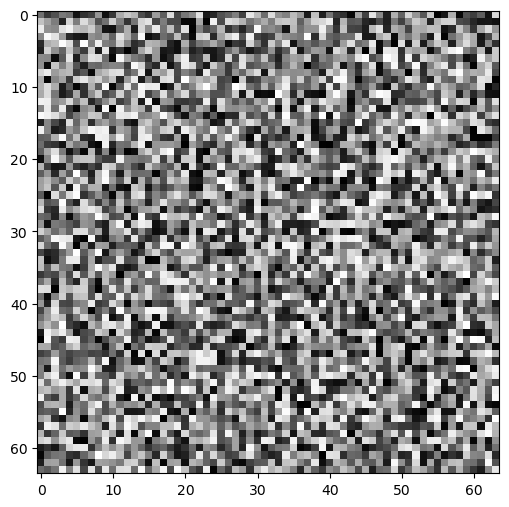

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


IMG_SIZE = 64
test_data = [(np.random.rand(IMG_SIZE, IMG_SIZE), 0) for _ in range(1)]

d = test_data[0]
img_data, img_num = d

data = np.expand_dims(img_data, axis=(0, -1))

prediction = model.predict(data)[0]

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.imshow(img_data, cmap="gray")

print('Cat Possibility: {:.2f}% \nDog Possibility: {:.2f}%'.format(prediction[0]*100, prediction[1]*100))

plt.show()

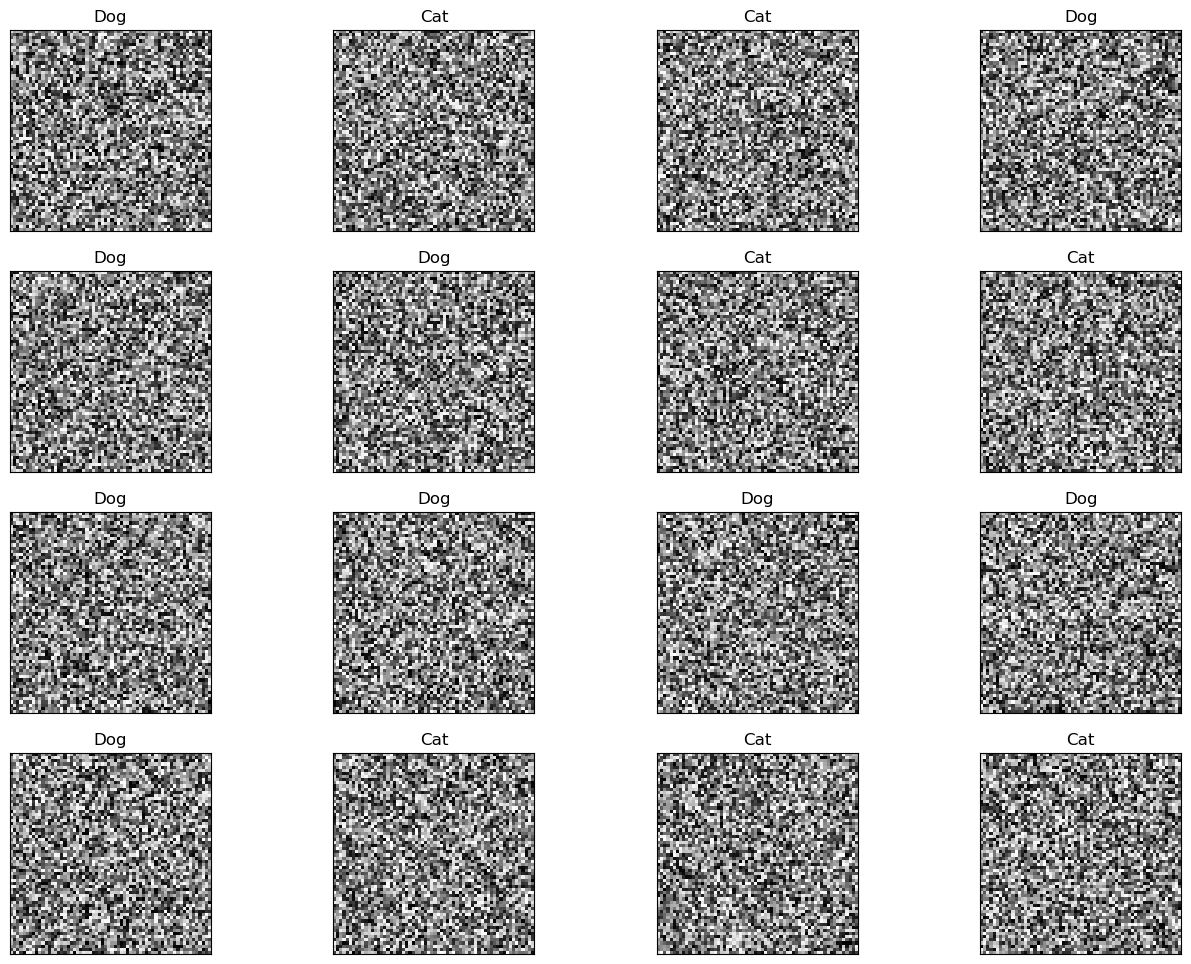

In [44]:
import numpy as np
import matplotlib.pyplot as plt

IMG_SIZE = 64

test_data = [(np.random.rand(IMG_SIZE, IMG_SIZE), i % 2) for i in range(20)]

fig = plt.figure(figsize=(16, 12))

for num, data in enumerate(test_data[:16]):
    img_data, img_num = data
    y = fig.add_subplot(4, 4, num + 1)
    orig = img_data
    data = img_data.reshape(1, IMG_SIZE, IMG_SIZE, 1)  

    model_out = np.random.rand(2)  

    if np.argmax(model_out) == 1:
        str_label = 'Dog'
    else:
        str_label = 'Cat'

    y.imshow(orig, cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)

plt.show()